## Input Image 10 X 10

### 180 181 181 182 179 184 184 184 186 187
### 180 182 182 185 185 185 188 186 188 186
### 186 180 183 182 186 189 191 191 192 194
### 180 183 186 185 194 180 132 85 84 69
### 183 181 187 191 150 44 16 16 17 18
### 181 183 190 155 27 13 12 12 13 16
### 186 185 181 37 14 14 15 15 16 14
### 183 195 96 16 14 14 15 14 14 15
### 191 159 24 13 13 12 13 14 14 14
### 185 49 15 16 16 13 12 12 13 14

In [1]:
import numpy as np
x = list(input().split())

180 181 181 182 179 184 184 184 186 187 180 182 182 185 185 185 188 186 188 186 186 180 183 182 186 189 191 191 192 194 180 183 186 185 194 180 132 85 84 69 183 181 187 191 150 44 16 16 17 18 181 183 190 155 27 13 12 12 13 16 186 185 181 37 14 14 15 15 16 14 183 195 96 16 14 14 15 14 14 15 191 159 24 13 13 12 13 14 14 14 185 49 15 16 16 13 12 12 13 14


In [3]:
for i in range(len(x)):
    x[i] = int(x[i])

In [4]:
x = np.reshape(x,(10,10))
x

array([[180, 181, 181, 182, 179, 184, 184, 184, 186, 187],
       [180, 182, 182, 185, 185, 185, 188, 186, 188, 186],
       [186, 180, 183, 182, 186, 189, 191, 191, 192, 194],
       [180, 183, 186, 185, 194, 180, 132,  85,  84,  69],
       [183, 181, 187, 191, 150,  44,  16,  16,  17,  18],
       [181, 183, 190, 155,  27,  13,  12,  12,  13,  16],
       [186, 185, 181,  37,  14,  14,  15,  15,  16,  14],
       [183, 195,  96,  16,  14,  14,  15,  14,  14,  15],
       [191, 159,  24,  13,  13,  12,  13,  14,  14,  14],
       [185,  49,  15,  16,  16,  13,  12,  12,  13,  14]])

# Using Sobel X and Sobel Y to find out first order derivative in X and Y direction

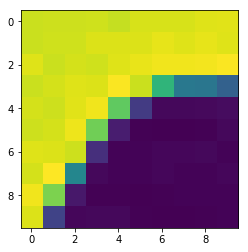

In [15]:
import matplotlib.pyplot as plt
plt.imshow(x)

In [20]:
gx = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
print(gx.shape)
print()
gx

(3, 3)



array([[-1,  0,  1],
       [-2,  0,  2],
       [-1,  0,  1]])

In [21]:
gy = gx.T
print(gy.shape)
print()
gy

(3, 3)



array([[-1, -2, -1],
       [ 0,  0,  0],
       [ 1,  2,  1]])

In [23]:
x[0:3,0:3]

array([[180, 181, 181],
       [180, 182, 182],
       [186, 180, 183]])

# Calculation of delta_Ix and delta_Iy

(8, 8)
Delta-X
-------
 [[  0.25    1.125   0.875   1.125   2.      0.5     0.375   0.75 ]
 [  0.25    1.125   2.125   1.125  -6.125 -11.25   -5.75   -1.25 ]
 [  1.625   2.     -2.25  -18.75  -31.625 -27.    -11.75   -3.375]
 [  2.875  -0.75  -28.625 -55.125 -43.125 -19.     -5.625  -1.   ]
 [  2.125 -24.25  -66.25  -56.75  -20.375  -3.625   0.5     1.125]
 [-11.    -62.875 -72.375 -23.75   -1.5     0.125   0.25    0.375]
 [-43.25  -81.5   -42.75   -3.5     0.375   0.375   0.      0.125]
 [-73.875 -63.    -12.875  -0.875  -0.375   0.375   0.25    0.375]]

Delta-Y
-------
 [[  0.75    0.375   1.125   2.375   3.      3.25    3.375   3.25 ]
 [  0.75    1.125   1.625   1.625  -7.125 -27.25  -45.25  -53.25 ]
 [  0.375   2.25   -1.75  -26.    -62.625 -83.75  -87.5   -87.625]
 [  0.625  -2.75  -27.875 -66.375 -77.625 -60.    -42.125 -33.5  ]
 [  0.625 -20.25  -56.25  -57.    -24.625  -4.125  -0.5    -0.875]
 [ -8.5   -39.375 -48.125 -20.5    -1.      1.125   1.      0.375]
 [-25.5   -45.5   -

Text(0.5, 1.0, 'Delta Y')

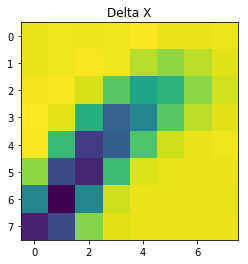

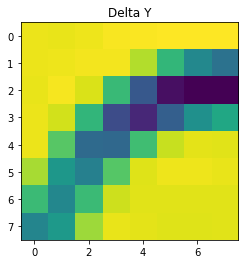

In [28]:
delta_x = np.zeros((8,8))
delta_y = np.zeros((8,8))

for i in range(1,9):
    for j in range(1,9):
        delta_x[i-1,j-1] = (1/8)*sum(sum(np.multiply(gx,x[i-1:i+2,j-1:j+2])))
        delta_y[i-1,j-1] = (1/8)*sum(sum(np.multiply(x[i-1:i+2,j-1:j+2],gy))) ## Stride = 1, Padding  = 0

plt.imshow(delta_x)
plt.title('Delta X')
plt.figure()        
print('Delta-X\n-------\n',delta_x)
print()
print('Delta-Y\n-------\n',delta_y)
plt.imshow(delta_y)
plt.title('Delta Y')

# Calculation of gradient magnitude and directions

In [72]:
grad_mag = np.zeros((8,8))
grad_dir = np.zeros((8,8))

for i in range(0,8):
    for j in range(0,8):
        grad_mag[i,j] = np.sqrt(delta_x[i,j]**2+delta_y[i,j]**2)
        grad_dir[i,j] = np.arctan(delta_y[i,j]/delta_x[i,j])

print('Gradient Magnitude\n-------------\n',grad_mag)
print()
print('Gradient Directions\n------------\n',grad_dir)

Gradient Magnitude
-------------
 [[ 0.79056942  1.18585412  1.42521928  2.62797451  3.60555128  3.28823661
   3.39576943  3.33541602]
 [ 0.79056942  1.59099026  2.67511682  1.97642354  9.39581024 29.48092604
  45.61386851 53.26466934]
 [ 1.66770801  3.01039864  2.85043856 32.05561573 70.15718958 87.99467313
  88.28540366 87.68997235]
 [ 2.94215057  2.85043856 39.95505287 86.2809727  88.79980997 62.93647591
  42.49889704 33.51492205]
 [ 2.21500564 31.59311634 86.90871648 80.43359062 31.9614025   5.49147066
   0.70710678  1.42521928]
 [13.90143877 74.18663121 86.91464923 31.37375496  1.80277564  1.13192314
   1.03077641  0.53033009]
 [50.20769363 93.34077351 49.90616194  4.94974747  0.95197164  0.95197164
   0.75        0.63737744]
 [87.22474563 73.83258088 16.22594373  0.95197164  0.53033009  1.18585412
   1.03077641  0.72886899]]

Gradient Directions
------------
 [[ 1.24904577  0.32175055  0.90975316  1.1284221   0.98279372  1.418147
   1.46013911  1.34399748]
 [ 1.24904577  0.785398

C:\Users\Rajat\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  import sys


HOG Feature Vector is of size 9 X 1 : 

[  8.01071835  94.29274515 461.15339533 278.57273594 171.5973133
 163.29141981 187.71098582  12.17302144 356.14542552]


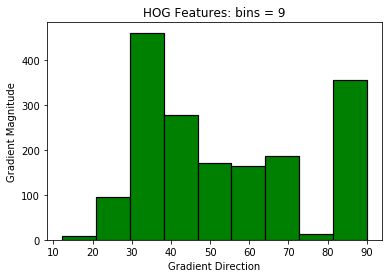

In [118]:
import math
# Converting gradient direction from radians to degrees 
grad_dir_degree = []
grad_dir_reshaped = grad_dir.reshape(64,1)

for i in grad_dir_reshaped:
    if math.degrees(i)>=0:
        grad_dir_degree.append(math.degrees(i))
    else: ## Unsign the gradients
        grad_dir_degree.append(-math.degrees(i))
   
n, bins, patches = plt.hist(grad_dir_degree, bins = 9, 
                            weights = grad_mag.reshape(64,1), histtype = 'bar', color = 'g', edgecolor='black', linewidth=1.2) 
plt.title('HOG Features: bins = 9')
plt.xlabel('Gradient Direction')
plt.ylabel('Gradient Magnitude')

#print(sum(grad_mag.reshape(64,1)))
#print(sum(n))
## weight = magnitude of gradient 
## Value = gradient direction in degrees
print('HOG Feature Vector is of size 9 X 1 : \n')
print(n)
## n: is the number of counts in each bin of the histogram (in case of unweighted histogram)
## n: is the weighted count (weight = grad_mag(i)/sum(grad_mag)) Hence = HOG Feature Vector 
## bins: is the left hand edge of each bin
## patchesis the individual patches used to create the histogram, e.g a collection of rectangles or individual plots 

HOG Feature Vector is of size: 12 X 1 

[  8.01071835   0.95197164 267.28720997 287.20695887 189.83064065
 224.88215004  39.06280983 159.68586853  34.01284382 161.94554939
 180.32378326 179.74725631]


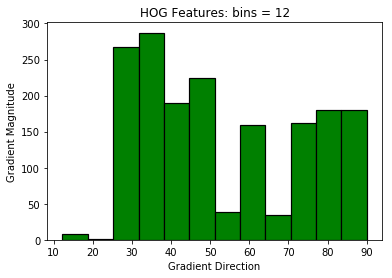

In [119]:
import math
# Converting gradient direction from radians to degrees 
grad_dir_degree = []
grad_dir_reshaped = grad_dir.reshape(64,1)

for i in grad_dir_reshaped:
    if math.degrees(i)>=0:
        grad_dir_degree.append(math.degrees(i))
    else: ## Unsign the gradients
        grad_dir_degree.append(-math.degrees(i))
   
n, bins, patches = plt.hist(grad_dir_degree, bins = 12, 
                            weights = grad_mag.reshape(64,1), histtype = 'bar', color = 'g',edgecolor='black', linewidth=1.2) 
plt.title('HOG Features: bins = 12')
plt.xlabel('Gradient Direction')
plt.ylabel('Gradient Magnitude')
print('HOG Feature Vector is of size: 12 X 1 \n')
print(n)
## weight = magnitude of gradient 
## Value = gradient direction in degrees